In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Udemy_DS\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\hearing_test.csv")

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

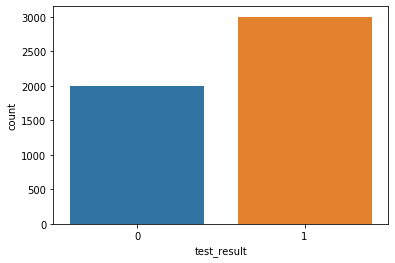

In [7]:
sns.countplot(data=df,x='test_result')

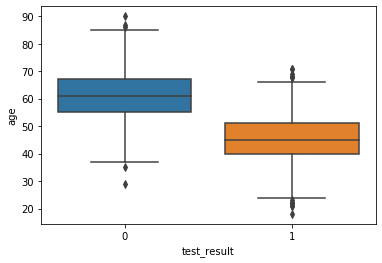

In [8]:
sns.boxplot(data=df,x='test_result',y='age')

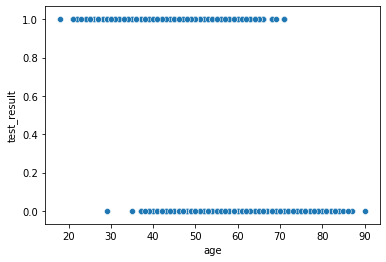

In [9]:
sns.scatterplot(data=df,x='age',y='test_result')

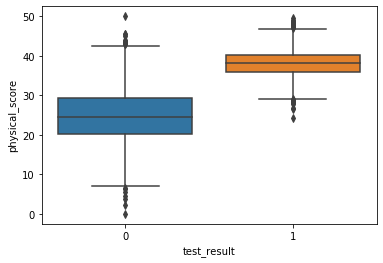

In [10]:
sns.boxplot(data=df,x='test_result',y='physical_score')

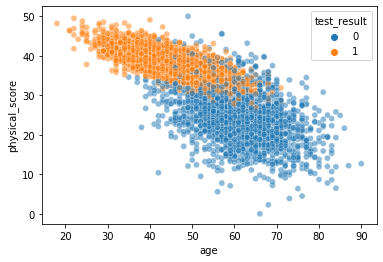

In [11]:
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result',alpha=0.5)

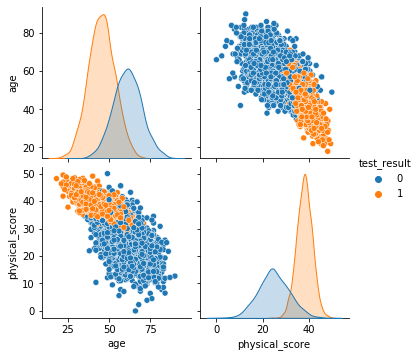

In [12]:
sns.pairplot(df,hue='test_result')

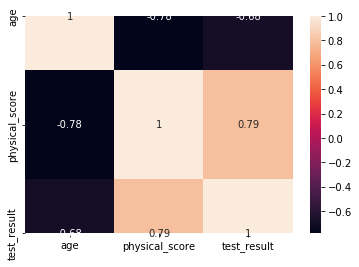

In [13]:
sns.heatmap(df.corr(),annot=True)

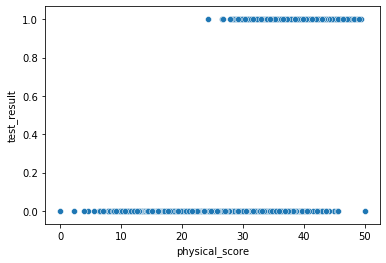

In [14]:
sns.scatterplot(data=df,x='physical_score',y='test_result')

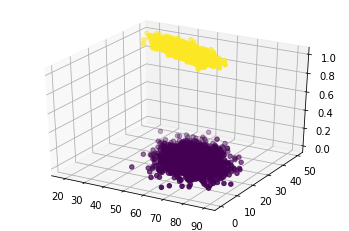

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

coef =  [[-0.94953524  3.45991194]]
accuracy:  0.93
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

0.9331210191082803
0.9543973941368078


C:\Users\hehexd\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hehexd\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

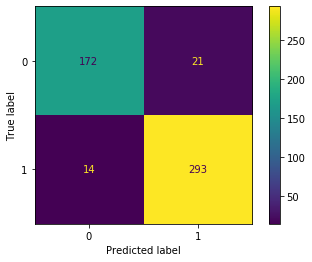

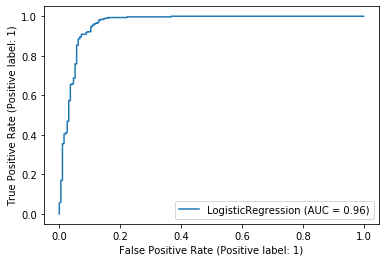

In [32]:
X = df.drop('test_result',axis=1)
y = df['test_result']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

# SEPARATE DATA
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)
# SCALER DATA
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
# CREATE MODEL
log_model = LogisticRegression()
# FIT
log_model.fit(scaled_X_train,y_train)
print("coef = ",log_model.coef_)
# PREDICT
y_pred = log_model.predict(scaled_X_test)
# METRICS
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(log_model,scaled_X_test,y_test)
print(classification_report(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_roc_curve(log_model,scaled_X_test,y_test)

log_model.predict_proba(scaled_X_test)

# Classification Metrics
* confusion matrix
* accuracy (true_pos+true_neg)/total 
    * accuracy paradox - imbalanced classes
* recall or sensitivity (true_pos)/total_pos
* precision (true_pos)/total_pred_pos
* F1 score F = 2*precision*recall/(precision+recall)
    * combines two prev metrics
* ROC curves: to visualize all the previous

# Multi-Class Classification

In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("C:\\Users\\hehexd\\Desktop\\Drive\\Udemy_DS\\UNZIP_FOR_NOTEBOOKS_FINAL\\DATA\\iris.csv")

In [36]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

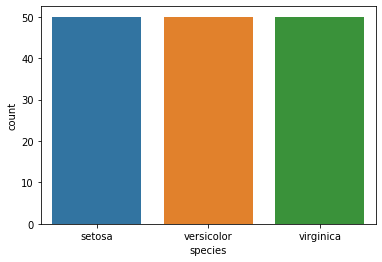

In [40]:
sns.countplot(data=df,x='species')

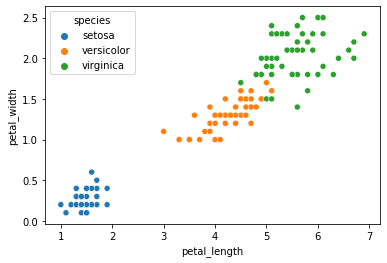

In [41]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

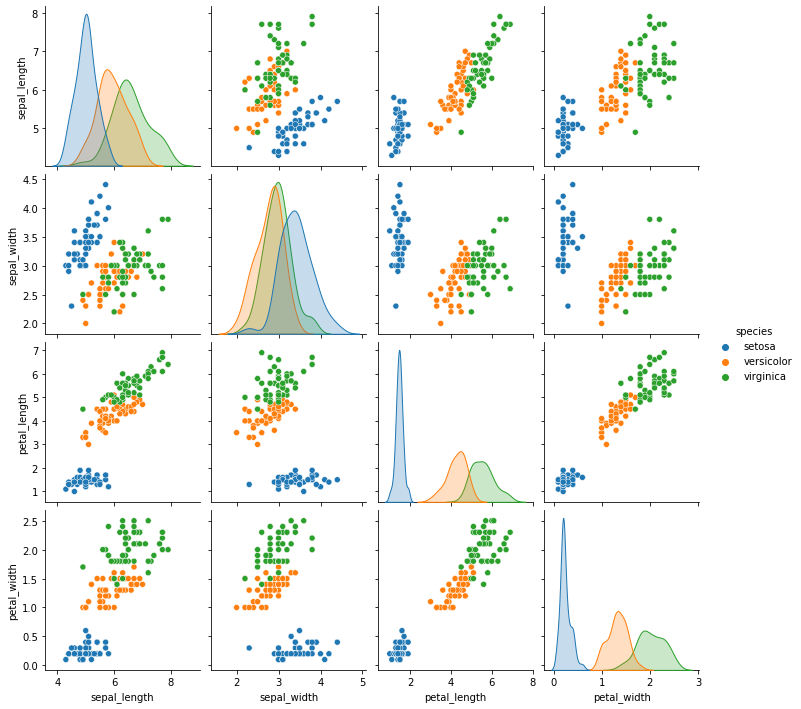

In [42]:
sns.pairplot(df,hue='species')

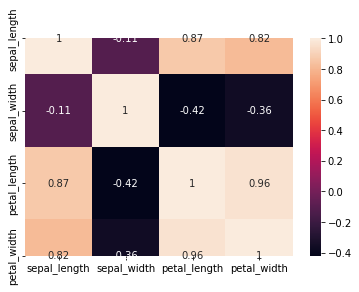

In [43]:
sns.heatmap(df.corr(),annot=True)

In [49]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

warnings.filterwarnings('ignore')

X = df.drop('species',axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(solver='saga',multi_class='ovr',
                               max_iter=5000)

penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty,
              'l1_ratio':l1_ratio,
              'C':C}
grid_model = GridSearchCV(log_model,param_grid=param_grid)
grid_model.fit(scaled_X_train,y_train)



GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

0.9736842105263158
[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



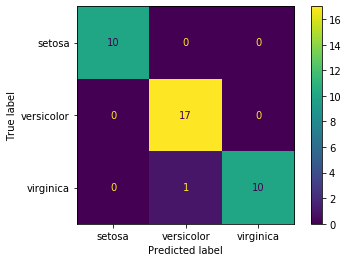

In [50]:
y_pred = grid_model.predict(scaled_X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(grid_model,scaled_X_test,y_test)
print(classification_report(y_test,y_pred))